# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">Este estudo tem como objetivo desenvolver um modelo preditivo de renda com base em informações coletadas de indivíduos, utilizando a base de dados histórica 'previsao_de_renda.csv'. O foco está em identificar as variáveis mais correlacionadas com a renda e analisá-las para criar um modelo eficiente na análise de crédito, auxiliando os clientes a tomar decisões mais informadas. Além disso, será feita uma avaliação detalhada do cenário, incluindo o público-alvo, a relevância dos dados e os desafios do processo, acompanhada por um planejamento claro para a execução do projeto.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">A segunda etapa consiste no entendimento dos dados. Foram disponibilizadas 14 variáveis, além da variável resposta, destacada em negrito na tabela, junto com a explicação de cada uma delas.</span>


### Dicionário de dados

<span style="color:red">Os dados estão organizados em uma tabela, onde cada linha representa um cliente e cada coluna armazena uma característica específica. Abaixo, incluímos uma cópia do dicionário de dados, que explica o significado de cada variável neste notebook.</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| id_cliente              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| sexo                    |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_veiculo        |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_imovel         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qtd_filhos              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_renda              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| educacao                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| estado_civil            |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_residencia         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| idade                   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tempo_emprego           |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qt_pessoas_residencia   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| renda                   |  ESCREVER AQUI                                      | ESCREVER AQUI|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [10]:
#pip install ydata_profiling

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.formula.api as smf 
import patsy

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 


%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head(4)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77


In [5]:
#Verificar os tipos de dados da variável renda
renda.dtypes

Unnamed: 0                 int64
data_ref                  object
id_cliente                 int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">A base de dados contém 15.000 linhas. Nela, 67,5% dos registros correspondem a pessoas do sexo feminino, e 67,6% dos indivíduos possuem imóvel. Além disso, 69,2% não têm filhos, enquanto 20,2% têm um filho. Entre as ocupações, 46,9% são assalariados e 21,6% são empresários. A maioria dos indivíduos, 70,2%, é casada. A idade mínima registrada é de 22 anos, com uma mediana de 43 anos, e a idade máxima é de 68 anos. A faixa etária mais frequente é de 40 anos, representando 3,6% da amostra. No que diz respeito ao número de pessoas por residência, o mínimo é 1, a mediana é 2, e o máximo é 15, sendo que 54,5% das residências abrigam 2 pessoas.</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">O arquivo analisado contém 15.000 linhas e 2.573 células com dados ausentes, representando cerca de 1,1% do total. Esse percentual é muito baixo, o que indica que a exclusão dessas linhas não comprometerá a análise. O dataset possui 15 variáveis, das quais 7 são numéricas, 6 categóricas e 2 booleanas. A variável "Unnamed" apresenta 15.000 valores distintos, que variam de 0 a 14.999, e será removida por se tratar de um número sequencial que não agrega valor à análise. As variáveis "id_cliente" e "data_ref" também serão eliminadas, pois não contribuem para o modelo preditivo. As variáveis categóricas serão analisadas e transformadas em variáveis dummy para inclusão no modelo, e o mesmo será feito com as variáveis booleanas, permitindo sua utilização na previsão.</span>


In [8]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])

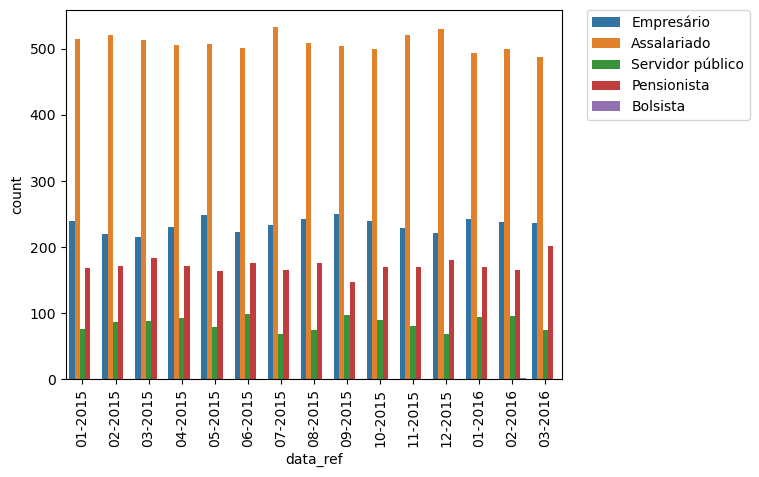

In [9]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Ajustar a posição da legenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

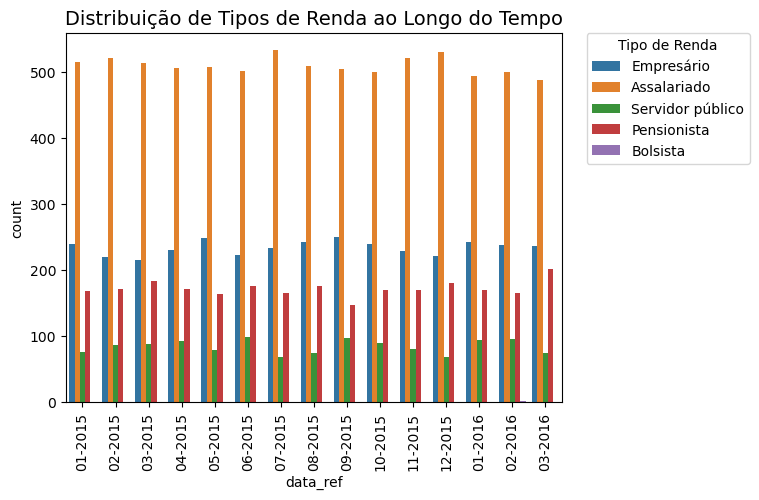

In [10]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_renda'
)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar título ao gráfico
ax.set_title('Distribuição de Tipos de Renda ao Longo do Tempo', fontsize=14)

# Adicionar e ajustar a legenda
plt.legend(
    title='Tipo de Renda',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

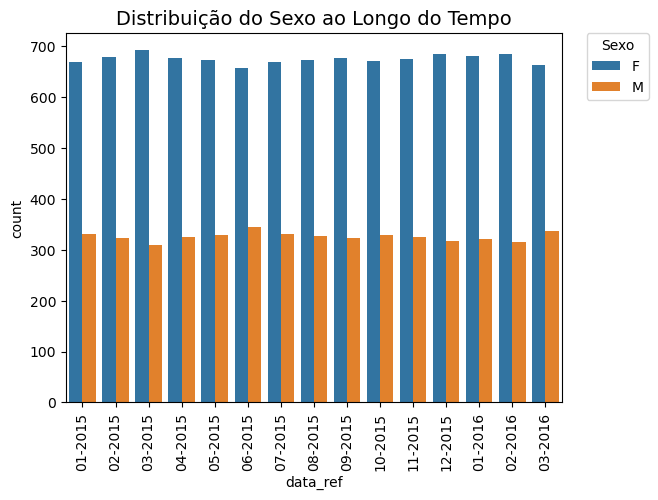

In [11]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='sexo'
)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar título ao gráfico
ax.set_title('Distribuição do Sexo ao Longo do Tempo', fontsize=14)

# Adicionar e ajustar a legenda
plt.legend(
    title='Sexo',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

C:\Users\Joel\AppData\Local\Temp\ipykernel_17020\1959517403.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


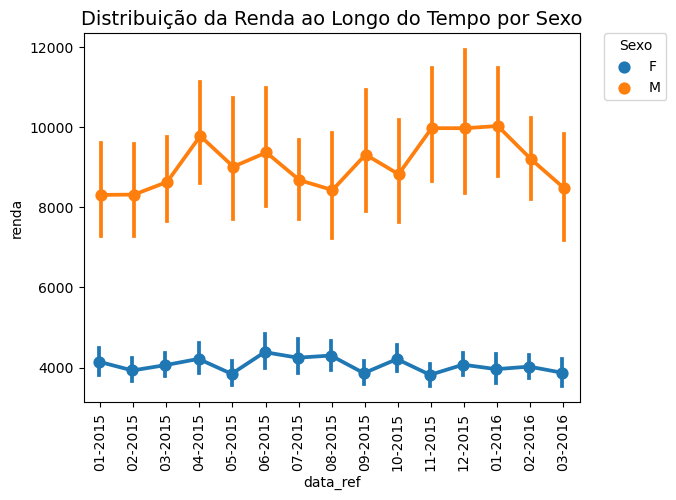

In [12]:
# Criar o gráfico de pontos
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='sexo',
    dodge=True,
    ci=95
)

# Adicionar título ao gráfico
ax.set_title('Distribuição da Renda ao Longo do Tempo por Sexo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Sexo',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

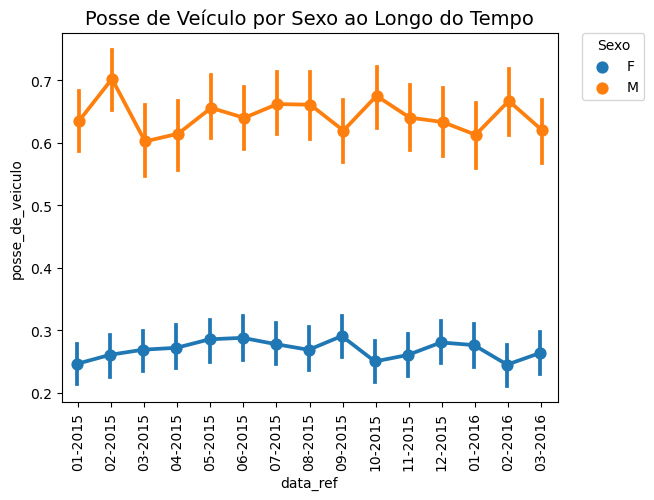

In [13]:
# Criar o gráfico de pontos
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_veiculo',
    hue='sexo',
    dodge=True
)

# Adicionar título ao gráfico
ax.set_title('Posse de Veículo por Sexo ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Sexo',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

C:\Users\Joel\AppData\Local\Temp\ipykernel_17020\1210473966.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


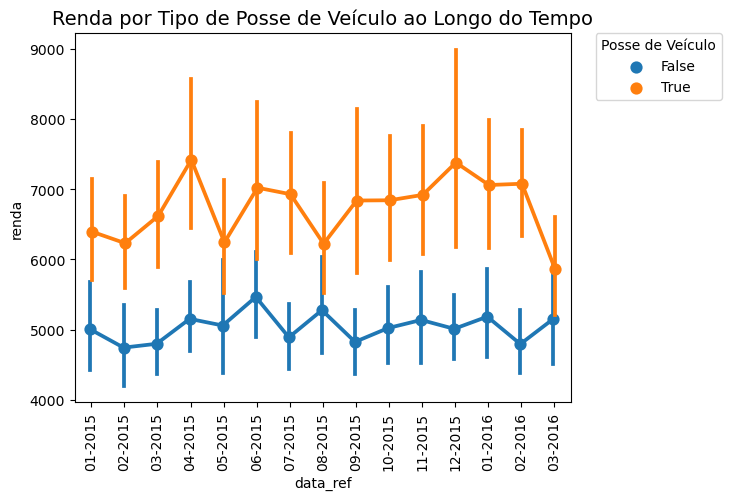

In [14]:
# Criar o gráfico de pontos
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_veiculo',
    dodge=True,
    ci=95
)

# Adicionar título ao gráfico
ax.set_title('Renda por Tipo de Posse de Veículo ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Posse de Veículo',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

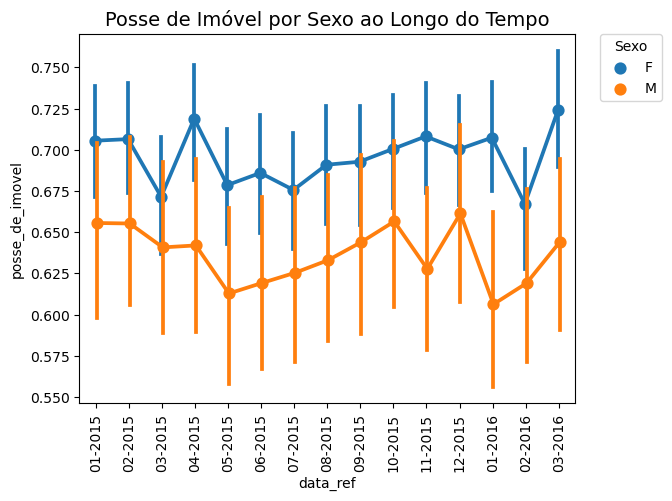

In [15]:
# Criar o gráfico de pontos
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='posse_de_imovel',
    hue='sexo',
    dodge=True
)

# Adicionar título ao gráfico
ax.set_title('Posse de Imóvel por Sexo ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Sexo',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

C:\Users\Joel\AppData\Local\Temp\ipykernel_17020\2980050160.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(


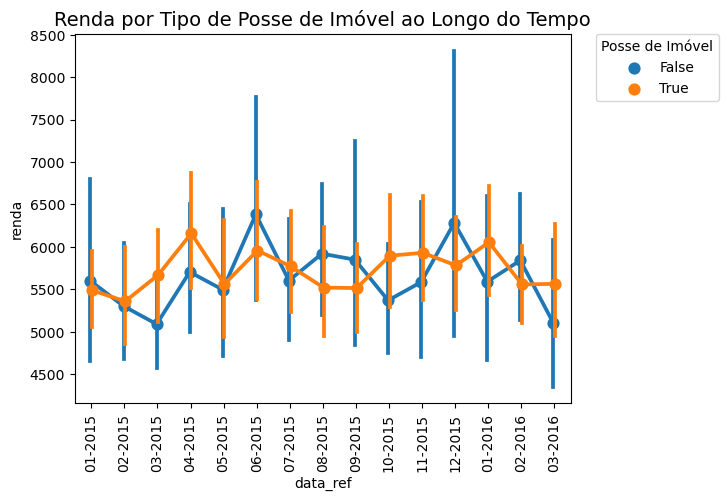

In [16]:
# Criar o gráfico de pontos
ax = sns.pointplot(
    data=renda,
    x='data_ref',
    y='renda',
    hue='posse_de_imovel',
    dodge=True,
    ci=95
)

# Adicionar título ao gráfico
ax.set_title('Renda por Tipo de Posse de Imóvel ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Posse de Imóvel',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

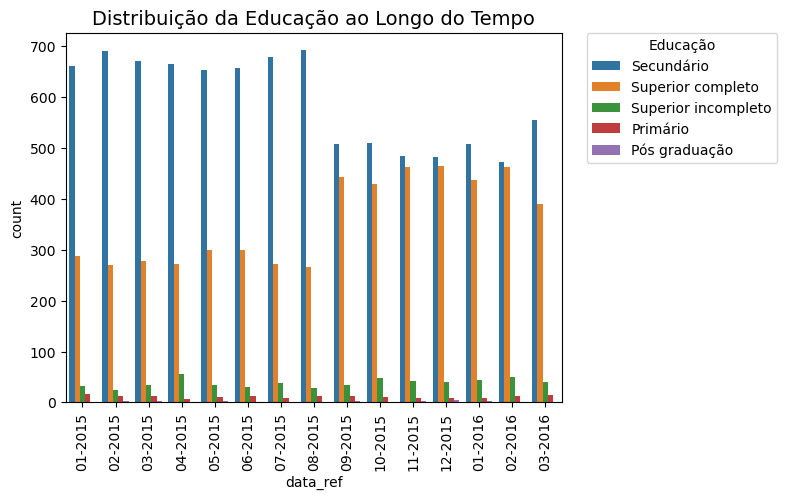

In [17]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='educacao'
)

# Adicionar título ao gráfico
ax.set_title('Distribuição da Educação ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Educação',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

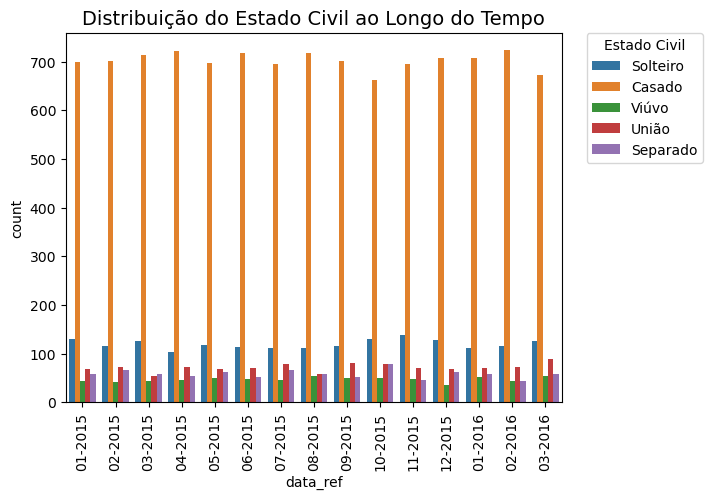

In [18]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='estado_civil'
)

# Adicionar título ao gráfico
ax.set_title('Distribuição do Estado Civil ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Estado Civil',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

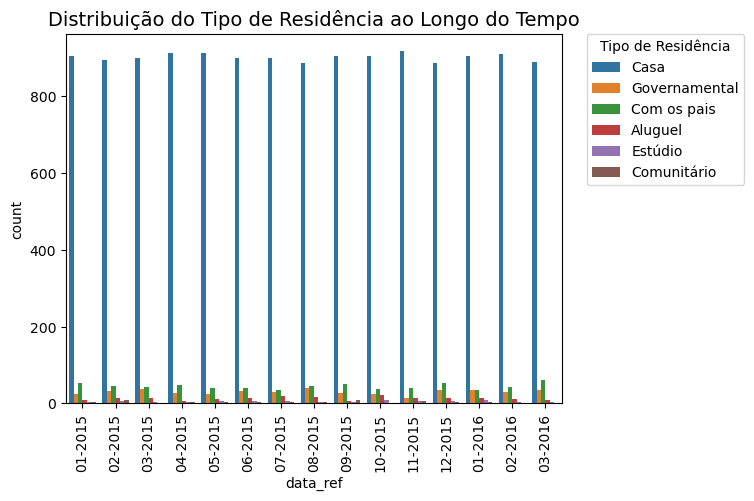

In [19]:
# Criar o gráfico de contagem
ax = sns.countplot(
    data=renda,
    x='data_ref',
    hue='tipo_residencia'
)

# Adicionar título ao gráfico
ax.set_title('Distribuição do Tipo de Residência ao Longo do Tempo', fontsize=14)

# Configurar os rótulos dos ticks do eixo x
tick_labs = renda['data_ref'].dt.strftime("%m-%Y").unique()
ax.set_xticks(range(len(tick_labs)))
ax.set_xticklabels(tick_labs, rotation=90)

# Adicionar e ajustar a legenda
plt.legend(
    title='Tipo de Residência',
    bbox_to_anchor=(1.05, 1),  # Posição da legenda
    loc='upper left',  # Localização da legenda
    borderaxespad=0.  # Espaçamento da borda
)

plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">Nesta etapa, realizamos as seguintes operações com os dados: seleção adequada das informações disponíveis, identificação e tratamento de dados faltantes (limpeza), criação de novas variáveis (construção) e verificação da utilidade dos formatos existentes (formatação). Como estamos lidando com uma única fonte de dados, não é necessária a etapa de integração.</span>


In [20]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15000 non-null  int64         
 1   data_ref               15000 non-null  datetime64[ns]
 2   id_cliente             15000 non-null  int64         
 3   sexo                   15000 non-null  object        
 4   posse_de_veiculo       15000 non-null  bool          
 5   posse_de_imovel        15000 non-null  bool          
 6   qtd_filhos             15000 non-null  int64         
 7   tipo_renda             15000 non-null  object        
 8   educacao               15000 non-null  object        
 9   estado_civil           15000 non-null  object        
 10  tipo_residencia        15000 non-null  object        
 11  idade                  15000 non-null  int64         
 12  tempo_emprego          12427 non-null  float64       
 13  q

In [21]:
# Remover colunas desnecessárias
renda = renda.drop(['Unnamed: 0', 'data_ref', 'id_cliente', 'tempo_emprego'], axis=1)

In [22]:
# Verificar a presença de valores ausentes
print(renda.isnull().sum())

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [23]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   qt_pessoas_residencia  15000 non-null  float64
 10  renda                  15000 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 1.1+ MB


In [24]:
# Remover duplicatas
renda = renda.drop_duplicates()

# Redefinir o índice
renda = renda.reset_index(drop=True)

# Exibir as dimensões do DataFrame
print(renda.shape)

# Exibir informações sobre o DataFrame
print("")
print(renda.info())

(10447, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   10447 non-null  object 
 1   posse_de_veiculo       10447 non-null  bool   
 2   posse_de_imovel        10447 non-null  bool   
 3   qtd_filhos             10447 non-null  int64  
 4   tipo_renda             10447 non-null  object 
 5   educacao               10447 non-null  object 
 6   estado_civil           10447 non-null  object 
 7   tipo_residencia        10447 non-null  object 
 8   idade                  10447 non-null  int64  
 9   qt_pessoas_residencia  10447 non-null  float64
 10  renda                  10447 non-null  float64
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 755.1+ KB
None


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">Na etapa de construção do modelo, começamos selecionando a técnica de modelagem mais apropriada para o problema e os dados disponíveis. Em seguida, definimos o desenho do teste, que inclui a divisão dos dados em conjuntos de treinamento e teste, além de estabelecer métricas de avaliação e estratégias de validação cruzada. Finalmente, treinamos o modelo com o conjunto de treinamento e avaliamos seu desempenho usando o conjunto de teste, analisando métricas como acurácia, precisão e recall para garantir que o modelo atenda aos requisitos desejados.</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


In [25]:
# Supondo que você já tenha carregado o DataFrame 'renda'
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], 
                      drop_first=True).copy()

# Verificar os tipos de dados das colunas
print(renda.dtypes)

posse_de_veiculo                    bool
posse_de_imovel                     bool
qtd_filhos                         int64
idade                              int64
qt_pessoas_residencia            float64
renda                            float64
sexo_M                              bool
tipo_renda_Bolsista                 bool
tipo_renda_Empresário               bool
tipo_renda_Pensionista              bool
tipo_renda_Servidor público         bool
educacao_Pós graduação              bool
educacao_Secundário                 bool
educacao_Superior completo          bool
educacao_Superior incompleto        bool
estado_civil_Separado               bool
estado_civil_Solteiro               bool
estado_civil_União                  bool
estado_civil_Viúvo                  bool
tipo_residencia_Casa                bool
tipo_residencia_Com os pais         bool
tipo_residencia_Comunitário         bool
tipo_residencia_Estúdio             bool
tipo_residencia_Governamental       bool
dtype: object


In [26]:
# Separar variáveis independentes (features) e variável dependente (target)
X = renda.drop(['renda'], axis=1).copy()  # Variáveis independentes
y = renda['renda']  # Variável dependente

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10447 entries, 0 to 10446
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               10447 non-null  bool   
 1   posse_de_imovel                10447 non-null  bool   
 2   qtd_filhos                     10447 non-null  int64  
 3   idade                          10447 non-null  int64  
 4   qt_pessoas_residencia          10447 non-null  float64
 5   sexo_M                         10447 non-null  bool   
 6   tipo_renda_Bolsista            10447 non-null  bool   
 7   tipo_renda_Empresário          10447 non-null  bool   
 8   tipo_renda_Pensionista         10447 non-null  bool   
 9   tipo_renda_Servidor público    10447 non-null  bool   
 10  educacao_Pós graduação         10447 non-null  bool   
 11  educacao_Secundário            10447 non-null  bool   
 12  educacao_Superior completo     10447 non-null 

In [28]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,   # 25% dos dados serão usados para teste
    random_state=42   # Número fixo para reprodutibilidade; pode ser qualquer número inteiro
)

In [29]:
# Criar os modelos com profundidades diferentes
reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = DecisionTreeRegressor(max_depth=8)

# Treinar os modelos usando o conjunto de treinamento
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [30]:
# Fazer previsões com os modelos treinados
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)

# Avaliar o desempenho dos modelos
mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)

r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)

print(f'Modelo com max_depth=4: MSE = {mse1}, R2 = {r2_1}')
print(f'Modelo com max_depth=8: MSE = {mse2}, R2 = {r2_2}')

Modelo com max_depth=4: MSE = 61775271.442326054, R2 = 0.12037121016976249
Modelo com max_depth=8: MSE = 75530690.02044904, R2 = -0.07549457746629895


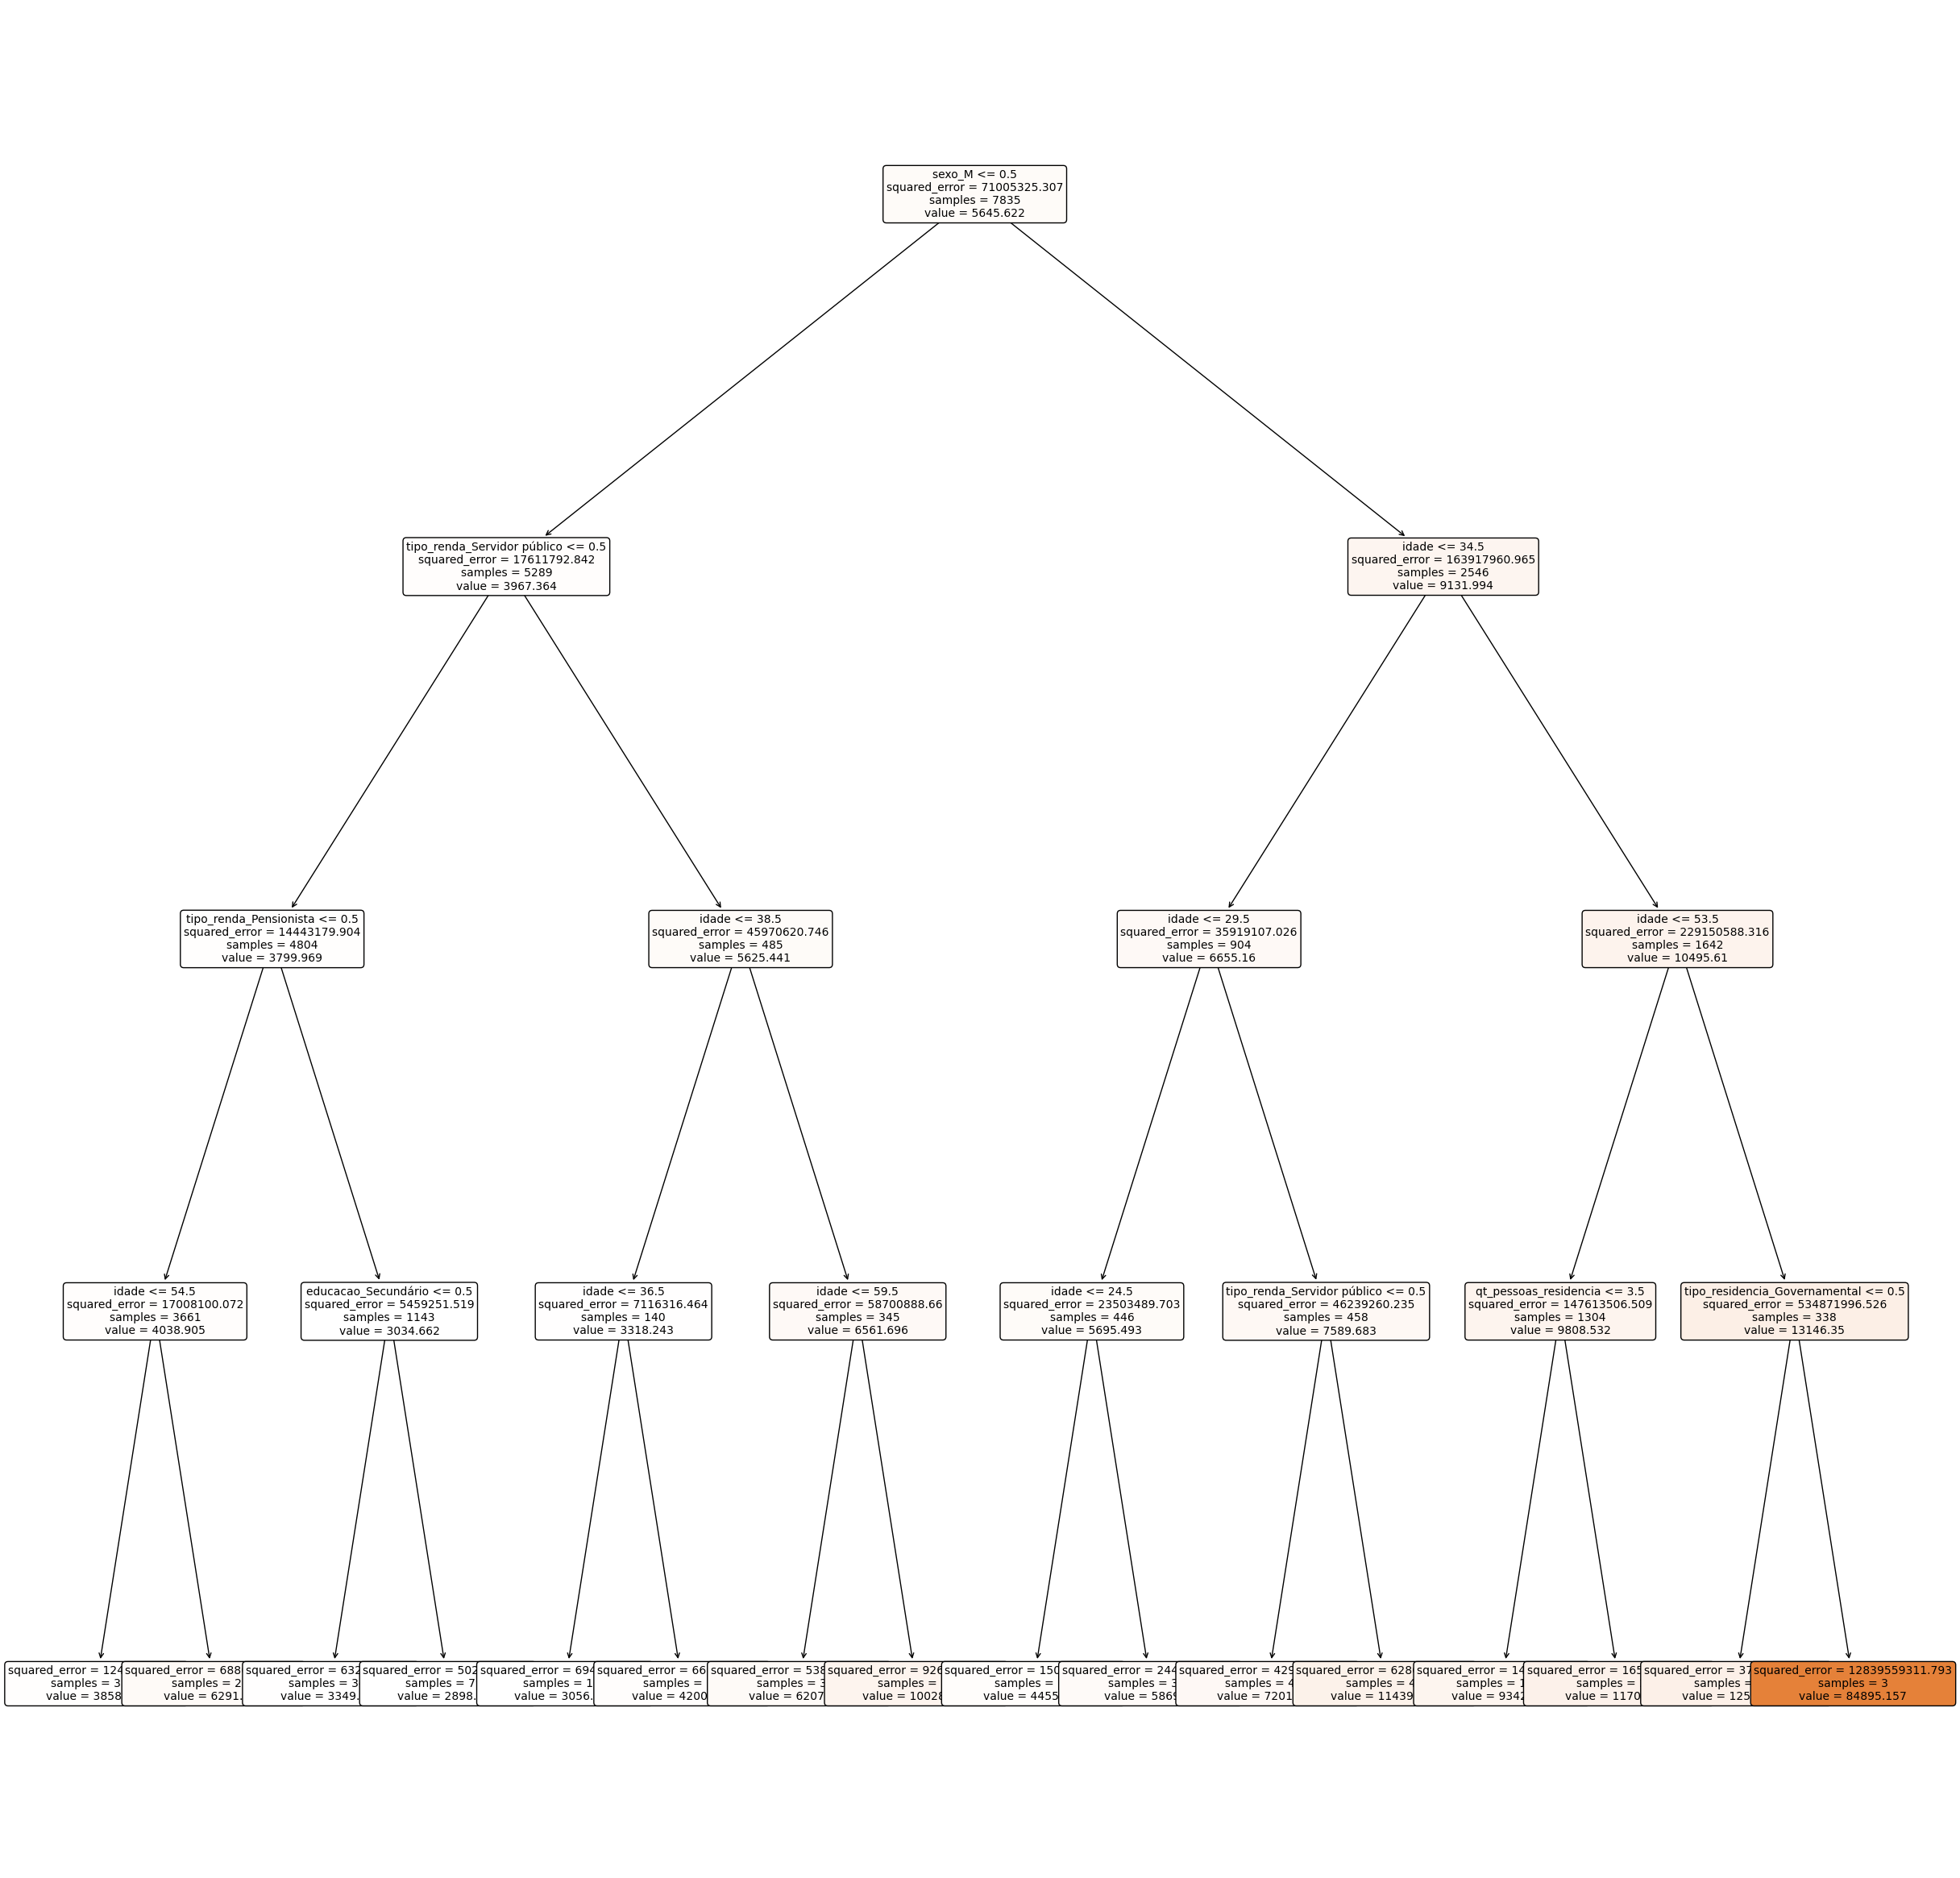

In [31]:
# Configurar o tamanho da figura
plt.rcParams['figure.figsize'] = [30, 30]

# Plotar a árvore de decisão
plt.figure()
tree.plot_tree(reg1,
               feature_names=X_test.columns,
               filled=True,
               rounded=True,
               fontsize=10)

# Exibir o gráfico
plt.show()

In [32]:
# Criar o modelo com pré-poda
reg1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

# Treinar o modelo
reg1.fit(X_train, y_train)

# Avaliar o desempenho do modelo
mse1 = reg1.score(X_test, y_test)

print(f'O R-quadrado da árvore com max_depth=4 e min_samples_leaf=20 é: {mse1:.2f}')

O R-quadrado da árvore com max_depth=4 e min_samples_leaf=20 é: 0.13


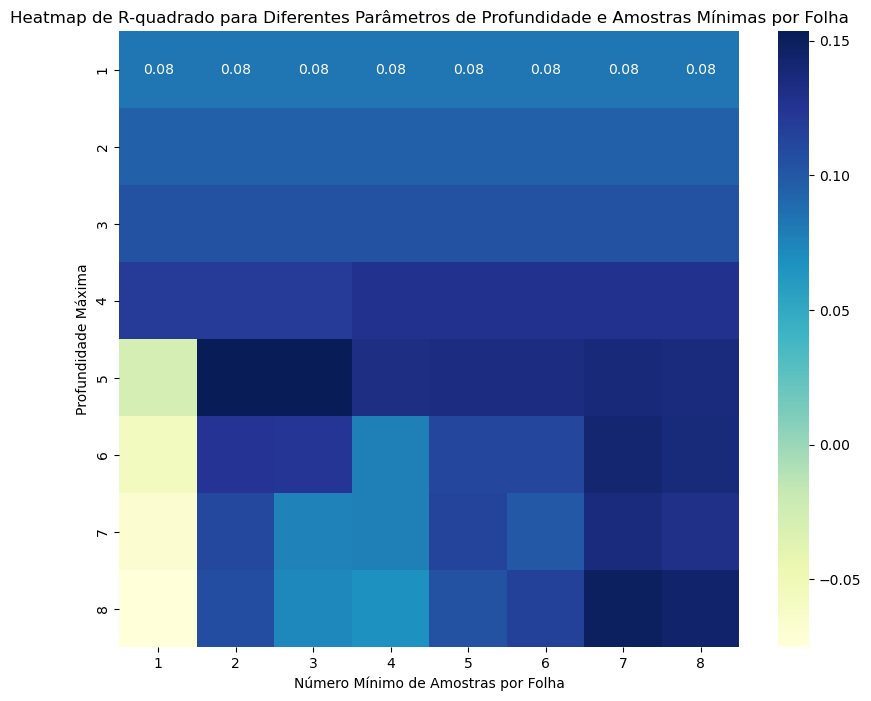

In [33]:
# Supondo que você já tenha X_train, X_test, y_train, y_test definidos
mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 9):
        reg1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        reg1.fit(X_train, y_train)
        mse1 = reg1.score(X_test, y_test)  # R-quadrado, use `mean_squared_error` se precisar do MSE
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses': mses, 'profundidade': ind_i, 'n_minimo': ind_j})

# Pivotar o DataFrame para a visualização
df_pivot = df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap de R-quadrado para Diferentes Parâmetros de Profundidade e Amostras Mínimas por Folha')
plt.xlabel('Número Mínimo de Amostras por Folha')
plt.ylabel('Profundidade Máxima')
plt.show()

## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">A árvore de decisão com profundidade 4 apresentou um 
R²
  12% melhor em comparação com a profundidade 8, além de ter um MSE inferior. Com 20 amostras mínimas por folha, o 
R²
  de treino foi de 21,75% e o 
R²
  de teste foi de 14,40%.</span>


In [37]:
print(f'R-quadrado de treino é: {reg1.score(X_train, y_train)*100:.2f}%')

R-quadrado de treino é: 21.36%


In [38]:
print(f'R-quadrado de teste é: {reg1.score(X_test, y_test)*100:.2f}%')

R-quadrado de teste é: 14.73%


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [ ]:
import streamlit as st

sns.set(context='talk', style='ticks')

st.set_page_config(
     page_title="Análise exploratória",
     page_icon="https://th.bing.com/th/id/R.832a74df43f13ad559124bcab9ea9c8d?rik=2oG9s6w2weVcGQ&pid=ImgRaw&r=0",
     layout="wide",
)

st.write('# Análise exploratória da previsão de renda')

# Carregamento dos dados
st.sidebar.markdown("### Carregue os dados")
uploaded_file = st.sidebar.file_uploader("Escolha um arquivo CSV", type="csv")

if uploaded_file is not None:
    renda = pd.read_csv(uploaded_file)
else:
    st.warning("Por favor, carregue um arquivo CSV.")
    st.stop()


#plots
fig, ax = plt.subplots(8,1,figsize=(10,70))
renda[['posse_de_imovel','renda']].plot(kind='hist', ax=ax[0])
st.write('## Gráficos ao longo do tempo')
sns.lineplot(x='data_ref',y='renda', hue='posse_de_imovel',data=renda, ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='posse_de_veiculo',data=renda, ax=ax[2])
ax[2].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='qtd_filhos',data=renda, ax=ax[3])
ax[3].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_renda',data=renda, ax=ax[4])
ax[4].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='educacao',data=renda, ax=ax[5])
ax[5].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='estado_civil',data=renda, ax=ax[6])
ax[6].tick_params(axis='x', rotation=45)
sns.lineplot(x='data_ref',y='renda', hue='tipo_residencia',data=renda, ax=ax[7])
ax[7].tick_params(axis='x', rotation=45)
sns.despine()
st.pyplot(plt)

st.write('## Gráficos bivariada')
fig, ax = plt.subplots(7,1,figsize=(10,50))
sns.barplot(x='posse_de_imovel',y='renda',data=renda, ax=ax[0])
sns.barplot(x='posse_de_veiculo',y='renda',data=renda, ax=ax[1])
sns.barplot(x='qtd_filhos',y='renda',data=renda, ax=ax[2])
sns.barplot(x='tipo_renda',y='renda',data=renda, ax=ax[3])
sns.barplot(x='educacao',y='renda',data=renda, ax=ax[4])
sns.barplot(x='estado_civil',y='renda',data=renda, ax=ax[5])
sns.barplot(x='tipo_residencia',y='renda',data=renda, ax=ax[6])
sns.despine()
st.pyplot(plt)

<span style="color:red">Aqui está o código com a adição do título, ícone e a barra para carregamento de um ou mais arquivos.csv</span>